In [ ]:
from collections import namedtuple


In [ ]:
Measure = namedtuple ("Measure", ["dp", "dT",  "dU"])
RowMeasure = namedtuple ("RowMeasure", ["dp", "dU"])

Experiment = namedtuple ("Experiment", ["T", "measures"])

In [ ]:
row_data = [
    Experiment(22.8, [
        RowMeasure(4,   -164),
        RowMeasure(3.4, -140),
        RowMeasure(3,   -114),
        RowMeasure(2.5, -91),
        RowMeasure(2,   -68),
    ]),
    
    Experiment(30, [
        RowMeasure(4,   -162),
        RowMeasure(3.4, -135),
        RowMeasure(3,   -110),
        RowMeasure(2.5, -88),
        RowMeasure(2,   -64),
    ]),

    Experiment(50, [
        RowMeasure(4,   -166),
        RowMeasure(3.4, -136),
        RowMeasure(3,   -106),
        RowMeasure(2.5, -82),
        RowMeasure(2,   -58),
    ])
]

temp_coef = {
    22.8: 40.7,
    30:   41.6,
    50:   43.3
}

data = []

for exp_row in row_data:
    exp = Experiment (exp_row.T, [Measure(measures_row.dp, measures_row.dU / temp_coef[exp.T], measures_row.dU) for measures_row in exp_row.measures])
    data.append(exp)

In [ ]:
data

[Experiment(T=22.8, measures=[Measure(dp=4, dT=-3.7875288683602775, dU=-164), Measure(dp=3.4, dT=-3.233256351039261, dU=-140), Measure(dp=3, dT=-2.632794457274827, dU=-114), Measure(dp=2.5, dT=-2.10161662817552, dU=-91), Measure(dp=2, dT=-1.5704387990762125, dU=-68)]),
 Experiment(T=30, measures=[Measure(dp=4, dT=-3.98034398034398, dU=-162), Measure(dp=3.4, dT=-3.3169533169533167, dU=-135), Measure(dp=3, dT=-2.7027027027027026, dU=-110), Measure(dp=2.5, dT=-2.162162162162162, dU=-88), Measure(dp=2, dT=-1.5724815724815724, dU=-64)]),
 Experiment(T=50, measures=[Measure(dp=4, dT=-3.9903846153846154, dU=-166), Measure(dp=3.4, dT=-3.269230769230769, dU=-136), Measure(dp=3, dT=-2.548076923076923, dU=-106), Measure(dp=2.5, dT=-1.971153846153846, dU=-82), Measure(dp=2, dT=-1.3942307692307692, dU=-58)])]

In [ ]:
for exp in data:
    T = exp.T
    print ("\\begin{table}[h]\n\\centering\n\\begin{tabular}{|c|c|c|}\\hline")
    print (f"\\multicolumn{{3}}{{|c|}}{{$T = {T}^\circ C$}}\\\\ \\hline")
    print ("$\\Delta P$, атм.\t& Напряжение, мкВ.\t& $\\Delta T,~^\\circ C$\t\\\\ \\hline")
    
    for mes in exp.measures:
        print (f"{mes.dp}\t& {mes.dU:.2f}\t& {mes.dT:.2f}\t\\\\ \\hline")
    
    print (f"\\end{{tabular}}\n\\caption{{Изменение температуры при различных давлениях, при начальной температуре $T = {T}^\circ C$}}")
    print (f"\\label{{tabl:data_{T}}}")
    print ("\\end{table}\n\n")

\begin{table}[h]
\centering
\begin{tabular}{|c|c|c|}\hline
\multicolumn{3}{|c|}{$T = 22.8^\circ C$}\\ \hline
$\Delta P$, атм.	& Напряжение, мкВ.	& $\Delta T,~^\circ C$	\\ \hline
4	& -164.00	& -3.79	\\ \hline
3.4	& -140.00	& -3.23	\\ \hline
3	& -114.00	& -2.63	\\ \hline
2.5	& -91.00	& -2.10	\\ \hline
2	& -68.00	& -1.57	\\ \hline
\end{tabular}
\caption{Изменение температуры при различных давлениях, при начальной температуре $T = 22.8^\circ C$}
\label{tabl:data_22.8}
\end{table}


\begin{table}[h]
\centering
\begin{tabular}{|c|c|c|}\hline
\multicolumn{3}{|c|}{$T = 30^\circ C$}\\ \hline
$\Delta P$, атм.	& Напряжение, мкВ.	& $\Delta T,~^\circ C$	\\ \hline
4	& -162.00	& -3.98	\\ \hline
3.4	& -135.00	& -3.32	\\ \hline
3	& -110.00	& -2.70	\\ \hline
2.5	& -88.00	& -2.16	\\ \hline
2	& -64.00	& -1.57	\\ \hline
\end{tabular}
\caption{Изменение температуры при различных давлениях, при начальной температуре $T = 30^\circ C$}
\label{tabl:data_30}
\end{table}


\begin{table}[h]
\centering
\begin{tabul

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
def get_line (x, y, delta=0.1):
    model = LinearRegression().fit(x.reshape(-1, 1), y)
    
    k = model.coef_[0]
    b = model.intercept_

    X = np.arange (x.min(), x.max() + delta, 0.1)
    Y = model.predict(X.reshape(-1, 1))

    return (X, Y), k, b

In [ ]:
def plot_exp (exp: Experiment):
    dp_exp = np.array([mes.dp for mes in exp.measures])
    dT_exp = np.array([mes.dT for mes in exp.measures])

    (X, Y), k, b = get_line(dp_exp, dT_exp)

    plt.rcParams.update({'font.size': 18})
    plt.figure (figsize=(10,8))

    plt.scatter (dp_exp, dT_exp)

    b_sign = '+' if b >= 0 else ''
    plt.plot (X, Y, label=f"ΔT = {k:.2f}Δp {b_sign} {b:.2f}")

    plt.title (f"Зависимость ΔT(Δp), при Т = {exp.T} °C")
    plt.xlabel("Δp, атм.")
    plt.ylabel("ΔT, °C")
    plt.grid()
    plt.legend()
    plt.savefig (f"plot_dt_from_dp_T_{exp.T}.png")
    plt.show()

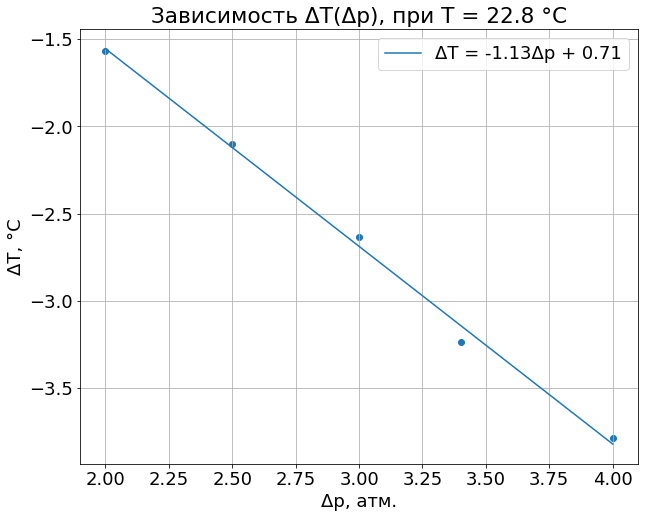

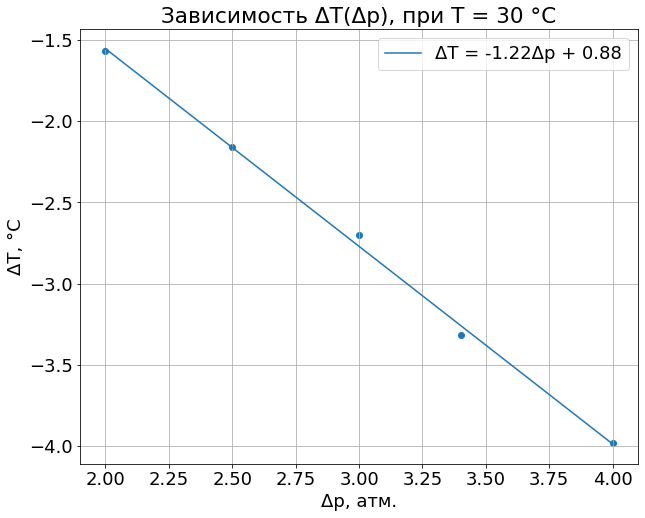

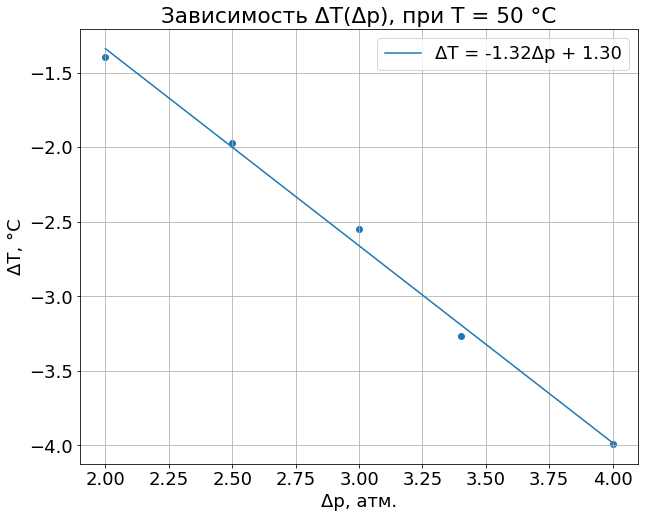

In [ ]:

for exp in data:
    plot_exp(exp)


In [ ]:
sigm_p = 0.05
sigm_u = 0.5

def count_mu (exp: Experiment):

    dp_exp = np.array([mes.dp for mes in exp.measures])
    dT_exp = np.array([mes.dT for mes in exp.measures])

    (X, Y), k, b = get_line(dp_exp, dT_exp)

    mu = k

    u = np.array([mes.dU for mes in exp.measures])
    p = np.array([mes.dp for mes in exp.measures])

    eps_u = sigm_u / u.mean()
    eps_p = sigm_p / p.mean()
    eps_mu = np.sqrt(eps_u**2 + eps_p**2)

    return mu, eps_mu

In [ ]:
print ("\\begin{table}[h]\n\\centering\n\\begin{tabular}{|c|c|c|}\\hline")
print ("$T,~^\\circ C$.\t& $\mu$, К/атм.\t& $\\varepsilon_{mu},~\%$\t\\\\ \\hline")
    
    

for exp in data:
    mu, eps_mu = count_mu(exp)
    print (f"${exp.T}$\t& ${mu:.2f}$\t& ${eps_mu*100:.2f}$\\\\ \\hline")

print (f"\\end{{tabular}}\n\\caption{{коэффициент $\mu_{{д-т}}$ для разных температур}}")
print (f"\\label{{tabl:mus}}")
print ("\\end{table}\n\n")

\begin{table}[h]
\centering
\begin{tabular}{|c|c|c|}\hline
$T,~^\circ C$.	& $\mu$, К/атм.	& $\varepsilon_{mu},~\%$	\\ \hline
$22.8$	& $-1.13$	& $1.73$\\ \hline
$30$	& $-1.22$	& $1.74$\\ \hline
$50$	& $-1.32$	& $1.74$\\ \hline
\end{tabular}
\caption{коэффициент $\mu_{д-т}$ для разных температур}
\label{tabl:mus}
\end{table}




In [ ]:
ExperimentResults = namedtuple ("ExperimentResults", ["mu", "eps_mu", "T"])

results = [ExperimentResults(*count_mu(exp), exp.T) for exp in data]

In [ ]:
results

[ExperimentResults(mu=-1.1321000820973965, eps_mu=0.017328924429228246, T=22.8),
 ExperimentResults(mu=-1.2160529602390069, eps_mu=0.017364333173956522, T=30),
 ExperimentResults(mu=-1.3213167646307176, eps_mu=0.017387670749568172, T=50)]

In [ ]:
def plot_results (results):
    mu_exp = np.array([res.mu for res in results])
    T_exp_K =  np.array([res.T for res in results]) + 273.15
    one_over_T_exp_K = ((1 / T_exp_K) * (10 ** 3))

    (X, Y), k, b = get_line(one_over_T_exp_K, mu_exp)

    plt.rcParams.update({'font.size': 18})
    plt.figure (figsize=(10,8))

    plt.scatter (one_over_T_exp_K, mu_exp)

    plt.plot (X, Y, label=f"μ = {k:.2f}(1/T) {'+' if b >= 0 else ''} {b:.2f}")

    plt.title (f"Зависимость μ(1/T)")
    plt.xlabel("1/T, K^-1 * 10^-3")
    plt.ylabel("μ , K / атм.")
    plt.grid()
    plt.legend()
    plt.savefig (f"plot_mu_from_one_over_T.png")
    plt.show()

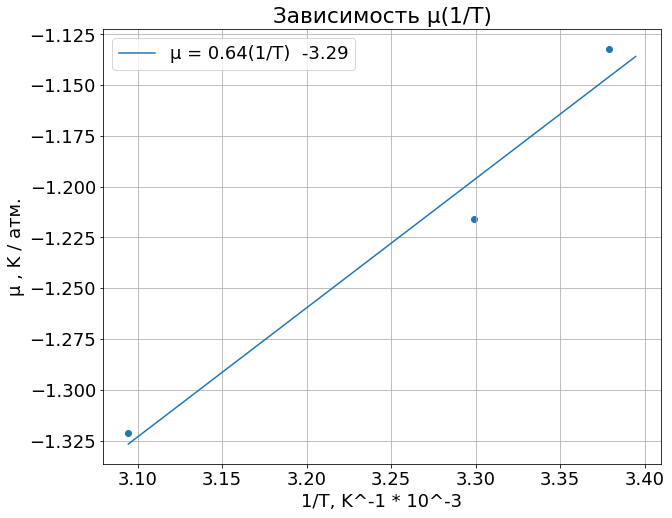

In [ ]:
plot_results(results)

In [425]:
Cp = 0.36
R = 8.31

def count_van_der_valls (results):
    mu_exp = np.array([res.mu for res in results])
    T_exp_K =  np.array([res.T for res in results]) + 273.15
    one_over_T_exp_K = ((1 / T_exp_K) * (10 ** 3))

    (X, Y), k, bias = get_line(one_over_T_exp_K, mu_exp)


    a = k * Cp * R / 2
    b = -1 * bias * Cp

    return a, b

In [426]:
count_van_der_valls (results)

(0.9512398736452522, 1.1860797671581933)